

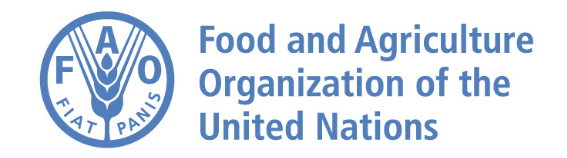

<h1><center> Etude de santé publique


In [1]:
# import necessary libraries
import numpy as np
import pandas as pd
import folium

-----
# Revue et retraitement des données
Avant de procéder aux analyses nous explorons les données et les retraitons pour les mettre en forme si necessaire

In [2]:
#import data
aide_alimentaire=pd.read_csv('aide_alimentaire.csv')
dispo_alimentaire=pd.read_csv('dispo_alimentaire.csv')
population=pd.read_csv('population.csv')
sous_nutrition=pd.read_csv('sous_nutrition.csv') # insécurité alimentaire

In [3]:
#exploration des données d'insécurité alimentaire  :
sous_nutrition.info()
display(sous_nutrition.head())
sous_nutrition.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Zone    1218 non-null   object
 1   Année   1218 non-null   object
 2   Valeur  624 non-null    object
dtypes: object(3)
memory usage: 28.7+ KB


,Zone,Année,Valeur
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5


,Zone,Année,Valeur
1213,Zimbabwe,2013-2015,NaN
1214,Zimbabwe,2014-2016,NaN
1215,Zimbabwe,2015-2017,NaN
1216,Zimbabwe,2016-2018,NaN
1217,Zimbabwe,2017-2019,NaN


In [4]:
sous_nutrition["Valeur"].describe()

count      624
unique     139
top       <0.1
freq       120
Name: Valeur, dtype: object

In [5]:
#exploration des données du fichier population :
population.info()
population.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1416 entries, 0 to 1415
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Zone    1416 non-null   object 
 1   Année   1416 non-null   int64  
 2   Valeur  1416 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 33.3+ KB


,Zone,Année,Valeur
0,Afghanistan,2013,32269.589
1,Afghanistan,2014,33370.794
2,Afghanistan,2015,34413.603
3,Afghanistan,2016,35383.032
4,Afghanistan,2017,36296.113


In [6]:
#Exploration des données de disponibilité alimentaire
dispo_alimentaire.info()
dispo_alimentaire.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15605 entries, 0 to 15604
Data columns (total 18 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Zone                                                           15605 non-null  object 
 1   Produit                                                        15605 non-null  object 
 2   Origine                                                        15605 non-null  object 
 3   Aliments pour animaux                                          2720 non-null   float64
 4   Autres Utilisations                                            5496 non-null   float64
 5   Disponibilité alimentaire (Kcal/personne/jour)                 14241 non-null  float64
 6   Disponibilité alimentaire en quantité (kg/personne/an)         14015 non-null  float64
 7   Disponibilité de matière grasse en quantité (g/personne/jo

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN


In [7]:
aide_alimentaire.info()
aide_alimentaire.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1475 entries, 0 to 1474
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Pays bénéficiaire  1475 non-null   object
 1   Année              1475 non-null   int64 
 2   Produit            1475 non-null   object
 3   Valeur             1475 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 46.2+ KB


,Pays bénéficiaire,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504


-----
# Analyses
-----

# Partie I

## I.1. Proportion des personnes en état de sous-nutrition


### I.1.2 Choix et hypothèses de calcul

Lors de l'exploration des données nous remarquons qu'il y a 594 valeurs manquantes ("Nan")et 120 lignes où le nombre de personnes en sous alimentation est inférieur à 100.000 ('<0.1').

L'impact de ces données sur les calculs de proportion étant marginal nous remplaçons ces données par 0 dans le dataframe sous_nutrition

In [8]:
#conversion des données de la colonne Valeur au format numérique
sous_nutrition['Valeur'] = pd.to_numeric(sous_nutrition['Valeur'], errors = 'coerce')
#remplacement des NaN en 0.
sous_nutrition.fillna(0, inplace = True)

In [9]:
#Vérification du dataframe.
sous_nutrition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Zone    1218 non-null   object 
 1   Année   1218 non-null   object 
 2   Valeur  1218 non-null   float64
dtypes: float64(1), object(2)
memory usage: 28.7+ KB


### I.1.2  Analyses
Pour calculer la proportion des personnes en état de sous-nutrition en 2017 nous devons : 
- calculer le nombre total de personnes en état de sous nutrition en 2017 à partir du des données du fichier sous_nutrition
- diviser le nombre de personnes par la population mondiale de 2017 estimées à partir du fichier population

In [10]:
sous_nutrition_2017=sous_nutrition[sous_nutrition["Année"]=="2016-2018"]
nbre_sous_nutris_2017 = sous_nutrition_2017['Valeur'].sum()*1000

In [11]:
population_2017=population[population["Année"]==2017]
pop_totale_2017= population_2017['Valeur'].sum()

In [12]:
prop_sous_nutris=nbre_sous_nutris_2017/pop_totale_2017*100
print("la proportion de personnes en état de sous nutrition en 2017 est de : {:.2f}%".format(prop_sous_nutris))

la proportion de personnes en état de sous nutrition en 2017 est de : 7.10%



## I. 2. Nombre théorique de personnes qui pourraient être nourries

Pour calculer le nombre théorique de personnes qui pourraient être nourries chaque jour dans le monde nous devons calculer la disponibilité alimentaire mondiale/par jour et par personne. 
Selon l'OMS en moyenne une personne a besoin de 2000kcal par jour pour être suffisament nourrie.


### I. 2.1 Calcul à partir de la disponibilité alimentaire mondiale

Pour estimer le nombre de personnes théorique qui pourraient être nourries chaque jour dans le monde, nous prenons comme hypothèse qu'une personne est bien nourrie à raison de 2000kcal par personne et par jour.

Nous calculons donc :
- la disponibilité alimentaire mondiale en Kcal/par jour 
- nous divisons ensuite le nombre obtenu par 2000


In [13]:
#integration de la population 2017 au dataframe 
dispo_alim= dispo_alimentaire.merge(population_2017[["Zone","Valeur"]], on="Zone")
dispo_alim=dispo_alim.rename(columns={"Valeur":"Population ('000')"})
#calcul de la disponibilité alimentaire en Kcal/jour 
dispo_alim["Disponibilité alimentaire (Kcal/jour)"]=dispo_alim["Disponibilité alimentaire (Kcal/personne/jour)"]*dispo_alim["Population ('000')"]*1000
dispo_alim.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Population ('000'),Disponibilité alimentaire (Kcal/jour)
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN,36296.113,181480565.0
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN,36296.113,36296113.0
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,36296.113,36296113.0
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,36296.113,0.0
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN,36296.113,145184452.0


In [14]:
#Calcul du nombre théorique de personnes nourries
dispo_annuelle= dispo_alim["Disponibilité alimentaire (Kcal/jour)"].sum()
personnes_nourries= int(dispo_annuelle/2000)
print("Avec la disponibilité alimentaire mondiale en Kcal on pourrait nourrir chaque jour \n{:,} de personnes dans le monde.".format(personnes_nourries))

Avec la disponibilité alimentaire mondiale en Kcal on pourrait nourrir chaque jour 
10,459,492,313 de personnes dans le monde.


### I.2.2 Calcul à partir de la disponibilité alimentaire des produits végétaux

Pour estimer le nombre de personnes théorique qui pourraient être nourries à raison de 2000 kcal par personne et par jour de produit végétaux, nous calculons la disponibilité alimentaire mondiale journalière de produit végétaux en kcal.

In [15]:
#filtre produits d'origine végétale
bool_series5=(dispo_alim["Origine"]=="vegetale")
dispo_annuelle_veg=dispo_alim.loc[bool_series5,"Disponibilité alimentaire (Kcal/jour)"].sum()

personnes_nourries_veg=int(dispo_annuelle_veg/2000)
print("Le nombre théorique de personnes qui pourraient être nourries chaque jour uniquement avec des produits végétaux est {:,}.".format(personnes_nourries_veg))

Le nombre théorique de personnes qui pourraient être nourries chaque jour uniquement avec des produits végétaux est 8,630,382,105.


## I.3. Utilisation de la disponibilité intérieure

- Disponibilité intérieure =  Nourriture + Alimentation pour animaux + Semences + Traitement + Autres Utilisations + Pertes

In [16]:
#part attribuée à l'alimentation animale
prop_animaux = dispo_alimentaire["Aliments pour animaux"].sum()/dispo_alimentaire['Disponibilité intérieure'].sum()*100
print("La part consacrée à l'alimentation animale est de {:.2f} %".format(prop_animaux))

La part consacrée à l'alimentation animale est de 13.24 %


In [17]:
#proportion des pertes
pertes= dispo_alimentaire["Pertes"].sum()/dispo_alimentaire['Disponibilité intérieure'].sum()*100
print("La proportion des pertes alimentaires est de {:.2f} %".format(pertes))

La proportion des pertes alimentaires est de 4.61 %


In [18]:
#proportion nourritures
nourriture=dispo_alimentaire["Nourriture"].sum()/dispo_alimentaire['Disponibilité intérieure'].sum()*100
print("La proportion consacrée à l'alimentation humaine est de {:.2f} %".format(nourriture))

La proportion consacrée à l'alimentation humaine est de 49.51 %


In [19]:
#proportion Autres
autres=dispo_alimentaire["Autres Utilisations"].sum()/dispo_alimentaire['Disponibilité intérieure'].sum()*100
print("La proportion consacrée aux autres utilisations est de {:.2f} %".format(autres))

La proportion consacrée aux autres utilisations est de 8.78 %


In [20]:
#proportion Semences
semences=dispo_alimentaire["Semences"].sum()/dispo_alimentaire['Disponibilité intérieure'].sum()*100
print("La proportion consacrée aux semances est de {:.2f} %".format(semences))

La proportion consacrée aux semances est de 1.57 %


In [21]:
#proportion traitements
traitement=dispo_alimentaire["Traitement"].sum()/dispo_alimentaire['Disponibilité intérieure'].sum()*100
print("La proportion consacrée aux traitements est de {:.2f} %".format(traitement))

La proportion consacrée aux traitements est de 22.38 %


<AxesSubplot:ylabel='None'>

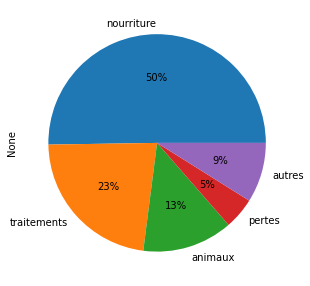

In [22]:
d=np.array([nourriture,traitement,prop_animaux,pertes, autres])
recap=pd.Series(data=d, index=["nourriture","traitements","animaux", "pertes","autres"])
recap.plot(kind='pie', autopct='%1.0f%%',figsize=(5,5))

# Partie II 

## II. 1 Pays où la proportion de personnes sous-alimentées est la plus forte en 2017

In [23]:
#fusion des données de nutrition par pays avec la population par pays pour 2017
nutrition_pop_2017=sous_nutrition_2017.merge(population_2017[["Zone","Valeur"]], on="Zone")
#calcul des proportion pour chaque pays 
prop_sous_al_2017=(nutrition_pop_2017["Valeur_x"]*1000/nutrition_pop_2017["Valeur_y"]*100)
#mise à jour du dataframe
nutrition_pop_2017["proportion"]=prop_sous_al_2017
nutrition_pop_2017=nutrition_pop_2017.sort_values("proportion", ascending=False).reset_index(drop=True)

In [24]:
nutrition_pop_2017.to_csv("nutrition_pop_2017.csv",";")

In [25]:
#identification des 5 pays avec la plus forte proportion de personnes sous-alimentées
nutrition_pop_2017[["Zone","proportion"]].head(5)

,Zone,proportion
0,Haïti,48.259182
1,République populaire démocratique de Corée,47.188685
2,Madagascar,41.062924
3,Libéria,38.279742
4,Lesotho,38.249438


In [26]:
world_geo = r'world_countries.json' # geojson file

# visualisation des pays selon la proportion des personnes sous alimentés
world_map = folium.Map(location=[0, 0], zoom_start=2, tiles="cartodbpositron")

world_map.choropleth(
    geo_data=world_geo,
    data=nutrition_pop_2017,
    columns=['Zone', 'proportion'],
    key_on='feature.properties.name',
    threshold_scale=[0,10,20,30,40,50],
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='proportion des personnes sous-alimentées en 2017'
)

world_map

In [27]:
#identification du 90eme quantile des pays les plus sous alimentés
quantile_90=nutrition_pop_2017["proportion"].quantile(0.9)
quantile_90_pays=nutrition_pop_2017.loc[nutrition_pop_2017['proportion']>=quantile_90, ["Zone","proportion"]].reset_index(drop=True)

<AxesSubplot:xlabel='Zone'>

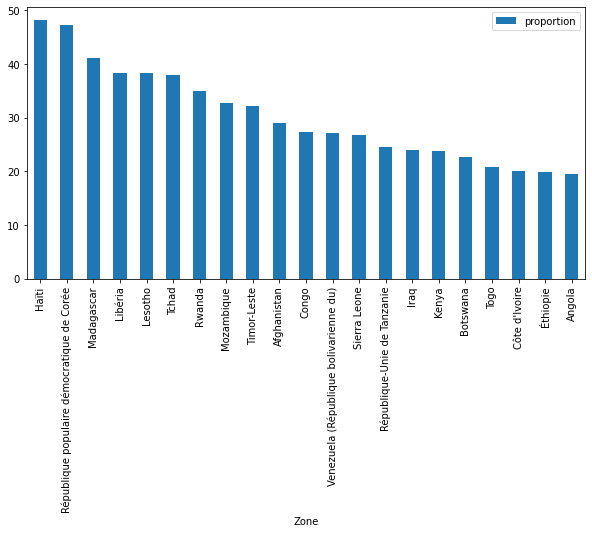

In [28]:
quantile_90_pays.set_index("Zone").plot.bar(figsize=(10,5))

## II. 2 Pays ayant le plus bénéficié d'aide depuis 2013

In [29]:
aide_alim=aide_alimentaire[["Pays bénéficiaire","Valeur"]].groupby("Pays bénéficiaire").sum().sort_values("Valeur", ascending=0).reset_index()
max_aide=aide_alim["Valeur"].max()
pays_max_aide=aide_alim.loc[aide_alim["Valeur"]==max_aide,["Pays bénéficiaire","Valeur"]]
print("Le pays ayant bénéficié du plus d'aide depuis 2013 est {} avec {:,} de tonnes".format(pays_max_aide.at[0,"Pays bénéficiaire"], max_aide))

Le pays ayant bénéficié du plus d'aide depuis 2013 est République arabe syrienne avec 1,858,943 de tonnes


In [30]:
aide_alim=aide_alim.rename(columns={"Valeur":"Aide depuis 2013"})
aide_alim.describe()
aide_alim.to_csv('aide_alim.csv',";")

In [32]:
world_geo = r'world_countries.json' # geojson file

# visualisation des pays selon l'aide reçue depuis 2013
world_map = folium.Map(location=[0, 0], zoom_start=2, tiles="cartodbpositron")

world_map.choropleth(
    geo_data=world_geo,
    data=aide_alim,
    columns=['Pays bénéficiaire', 'Aide depuis 2013'],
    key_on='feature.properties.name',
    threshold_scale=[0,0.25*10**6,0.5*10**6,1*10**6,1.5*10**6,2*10**6],
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Aide alimentaire reçue depuis 2013'
)

world_map

In [33]:
# 10 pays ayant reçu le plus d'aide alimentaire depuis 2013
aide_alim.head(10)

,Pays bénéficiaire,Aide depuis 2013
0,République arabe syrienne,1858943
1,Éthiopie,1381294
2,Yémen,1206484
3,Soudan du Sud,695248
4,Soudan,669784
5,Kenya,552836
6,Bangladesh,348188
7,Somalie,292678
8,République démocratique du Congo,288502
9,Niger,276344


<AxesSubplot:xlabel='Pays bénéficiaire'>

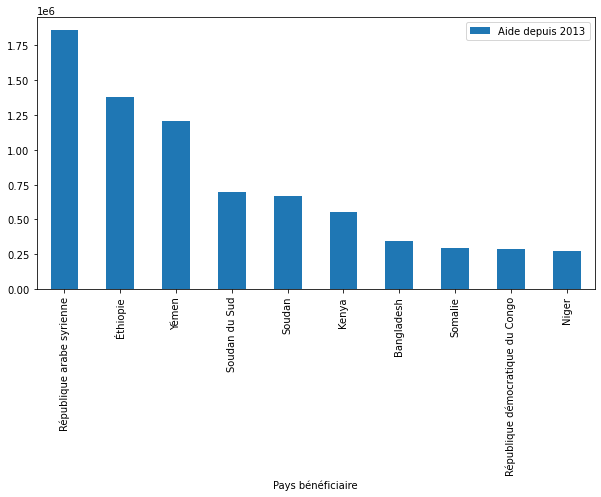

In [34]:
aide_alim.head(10).set_index('Pays bénéficiaire').plot.bar(figsize=(10,5))

## II. 3 Pays ayant le plus/moins de disponibilité alimentaire par habitant

Afin d'identifier les pays, nous devons d'abord calculer la disponibilité alimentaire pour chaque pays

In [35]:
dispo_al_pays=dispo_alimentaire.groupby("Zone").sum().sort_values("Disponibilité alimentaire (Kcal/personne/jour)")

In [36]:
dispo_al_pays.describe()

,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
count,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,1.740000e+02,174.000000,174.000000,1.740000e+02,174.000000,1.740000e+02,174.000000,174.000000,174.000000
mean,7495.660920,4971.396552,2847.367816,702.310000,86.971322,81.299598,5.660341e+04,7771.022989,7448.580460,2.802447e+04,2607.459770,5.752690e+04,888.971264,12670.614943,-600.011494
std,29613.064847,30724.740191,438.546907,206.182832,34.603659,19.964573,2.008030e+05,19524.993116,16650.072042,1.092607e+05,9949.343198,2.021400e+05,3141.323013,44526.233238,3255.852935
min,0.000000,0.000000,1879.000000,319.450000,23.770000,37.660000,5.900000e+01,0.000000,22.000000,2.600000e+01,0.000000,6.000000e+00,0.000000,0.000000,-35032.000000
25%,113.000000,89.250000,2530.250000,545.187500,59.262500,64.327500,2.854500e+03,147.500000,558.750000,1.748000e+03,92.750000,2.049250e+03,15.250000,107.750000,-288.750000
50%,959.500000,382.000000,2830.500000,672.100000,82.450000,81.590000,1.113200e+04,826.500000,1829.500000,5.786500e+03,443.500000,1.058650e+04,138.000000,1216.500000,-4.500000
75%,4427.750000,1593.750000,3186.000000,863.400000,114.052500,94.945000,3.122925e+04,5725.750000,6281.000000,1.794800e+04,1622.500000,3.017850e+04,427.000000,5668.750000,123.000000
max,345951.000000,367300.000000,3770.000000,1210.410000,170.440000,133.060000,2.036726e+06,163524.000000,156246.000000,1.249625e+06,89575.000000,1.930913e+06,29432.000000,367282.000000,3339.000000


In [37]:
world_map_2 = folium.Map(location=[0, 0], zoom_start=2,tiles="cartodbpositron")

world_map_2.choropleth(
    geo_data=world_geo,
    data=dispo_al_pays.reset_index(),
    columns=['Zone', 'Disponibilité alimentaire (Kcal/personne/jour)'],
    key_on='feature.properties.name',
    threshold_scale=[1500,2000,2500,3000,3500,4000],
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Disponibilité alimentaire (Kcal/personne/jour)'
)

world_map_2

In [38]:
quantile_5_dispo=dispo_al_pays["Disponibilité alimentaire (Kcal/personne/jour)"].quantile(0.05)
print("les pays où la disponibilité alimentaire par personne est inférieure au 5eme quantile sont :")
dispo_al_pays.loc[dispo_al_pays["Disponibilité alimentaire (Kcal/personne/jour)"]<quantile_5_dispo,'Disponibilité alimentaire (Kcal/personne/jour)':'Disponibilité de protéines en quantité (g/personne/jour)']

les pays où la disponibilité alimentaire par personne est inférieure au 5eme quantile sont :


,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour)
Zone,,,,
République centrafricaine,1879.0,453.73,59.41,46.04
Zambie,1924.0,350.12,42.05,55.22
Madagascar,2056.0,425.07,24.49,46.69
Afghanistan,2087.0,351.41,33.50,58.26
Haïti,2089.0,397.78,48.92,47.70
République populaire démocratique de Corée,2093.0,458.93,36.41,54.99
Tchad,2109.0,319.45,47.10,62.75
Zimbabwe,2113.0,336.59,57.18,48.32
Ouganda,2126.0,535.58,46.57,52.64


In [39]:
quantile_95_dispo=dispo_al_pays["Disponibilité alimentaire (Kcal/personne/jour)"].quantile(0.95)
dispo_al_pays.loc[dispo_al_pays["Disponibilité alimentaire (Kcal/personne/jour)"]>quantile_95_dispo,'Disponibilité alimentaire (Kcal/personne/jour)':'Disponibilité de protéines en quantité (g/personne/jour)']

,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour)
Zone,,,,
Égypte,3518.0,803.79,63.09,103.22
Luxembourg,3540.0,1150.66,141.49,113.64
Italie,3578.0,993.20,154.69,108.49
Irlande,3602.0,1150.15,125.69,109.91
Israël,3610.0,922.14,151.39,128.00
États-Unis d'Amérique,3682.0,1002.39,161.37,109.42
Turquie,3708.0,968.15,119.64,108.12
Belgique,3737.0,1002.09,161.95,99.37
Autriche,3770.0,1069.20,170.44,106.20


# III Analyses complémentaires

## III.1 Utilisation par produits

Analysons les principaux produits utilisés pour l'alimentation des animaux et les traitements

In [40]:
dispo_produit=dispo_alim[["Produit",'Disponibilité intérieure',"Nourriture","Aliments pour animaux","Traitement","Autres Utilisations"]].groupby("Produit").sum()
dispo_produit["% Animaux"]=dispo_produit["Aliments pour animaux"]/dispo_produit['Disponibilité intérieure']*100
dispo_produit["% Nourriture"]=dispo_produit["Nourriture"]/dispo_produit['Disponibilité intérieure']*100
dispo_produit["% Traitement"]=dispo_produit["Traitement"]/dispo_produit['Disponibilité intérieure']*100
dispo_produit["% Autres Utilisations"]=dispo_produit["Autres Utilisations"]/dispo_produit['Disponibilité intérieure']*100

In [41]:
dispo_produit.sort_values("Traitement", ascending=False).head()

,Disponibilité intérieure,Nourriture,Aliments pour animaux,Traitement,Autres Utilisations,% Animaux,% Nourriture,% Traitement,% Autres Utilisations
Produit,,,,,,,,,
"Sucre, canne",1877728.0,32189.0,27340.0,1362076.0,357333.0,1.456015,1.714253,72.538515,19.030073
Soja,266686.0,10636.0,17439.0,226606.0,638.0,6.539151,3.988211,84.971090,0.239233
"Sucre, betterave",238192.0,57.0,12394.0,219371.0,5830.0,5.203365,0.023930,92.098391,2.447605
Graines Colza/Moutarde,67159.0,1030.0,5970.0,57612.0,314.0,8.889352,1.533674,85.784482,0.467547
Maïs,953202.0,125000.0,544746.0,47253.0,188824.0,57.149062,13.113695,4.957291,19.809442


In [42]:
dispo_produit.sort_values("Aliments pour animaux", ascending=False).head()

,Disponibilité intérieure,Nourriture,Aliments pour animaux,Traitement,Autres Utilisations,% Animaux,% Nourriture,% Traitement,% Autres Utilisations
Produit,,,,,,,,,
Maïs,953202.0,125000.0,544746.0,47253.0,188824.0,57.149062,13.113695,4.957291,19.809442
Blé,661667.0,450581.0,121686.0,7513.0,20931.0,18.390822,68.097850,1.135465,3.163374
Orge,134152.0,6744.0,88798.0,24863.0,649.0,66.192081,5.027133,18.533455,0.483780
Manioc,256634.0,100637.0,87044.0,2456.0,35973.0,33.917564,39.214212,0.957005,14.017239
Lait - Excl Beurre,729538.0,612931.0,80524.0,155.0,17894.0,11.037670,84.016323,0.021246,2.452785


## III.2 Utilisation du sucre

In [43]:
dispo_sucres=dispo_produit.loc[["Sucre Eq Brut", "Sucre, betterave", "Sucre, canne", 'Sucre, betterave']]
Prop_sucres=dispo_sucres[["Disponibilité intérieure","Nourriture","Aliments pour animaux","Traitement"]].sum()/dispo_produit[["Disponibilité intérieure","Nourriture","Aliments pour animaux","Traitement"]].sum()*100
print("Le sucre représente {:.2f} % de la disponibilité alimentaire mondiale, \n".format(Prop_sucres[0]),
"mais il représente {:.2f} % de la diponibilité alimentaire consacrée aux traitements et {:.2f}% de la disponibilité consacrée à la nourriture .".format(Prop_sucres[3], Prop_sucres[1]))

Le sucre représente 25.89 % de la disponibilité alimentaire mondiale, 
 mais il représente 82.90 % de la diponibilité alimentaire consacrée aux traitements et 3.60% de la disponibilité consacrée à la nourriture .


In [44]:
sucre_t=dispo_sucres["Traitement"].sum()/dispo_sucres["Disponibilité intérieure"].sum()*100
sucre_nour=dispo_sucres["Nourriture"].sum()/dispo_sucres["Disponibilité intérieure"].sum()*100
sucre_autres=dispo_sucres["Autres Utilisations"].sum()/dispo_sucres["Disponibilité intérieure"].sum()*100

print("{:.2f} % de la disponibilité en sucre est destinée au traitement {:.2f}% aux autres utilisations et seulement {:.2f} % est utilisé directement pour la nourriture .".format(sucre_t,sucre_autres,sucre_nour))

71.89 % de la disponibilité en sucre est destinée au traitement 15.16% aux autres utilisations et seulement 6.87 % est utilisé directement pour la nourriture .


## III.2 Utilisation du soja 

In [45]:
dispo_soja=dispo_produit.loc["Soja"]
Prop_soja=dispo_soja[["Disponibilité intérieure","Nourriture","Aliments pour animaux","Traitement"]]/dispo_produit[["Disponibilité intérieure","Nourriture","Aliments pour animaux","Traitement"]].sum()*100
print(" Le soja représente {:.2f} % de la disponibilité alimentaire mondiale, \n".format(Prop_soja[0]),
"mais il représente {:.2f} % de la disponibilité alimentaire consacrée traitements et seulement {:.2f}% de la disponibilité consacrée à la nourriture.".format(Prop_soja[3], Prop_soja[1]))

 Le soja représente 2.74 % de la disponibilité alimentaire mondiale, 
 mais il représente 10.37 % de la disponibilité alimentaire consacrée traitements et seulement 0.22% de la disponibilité consacrée à la nourriture.


## III.3 Utilisation des céréales

liste des céréales : le maïs, le sorgho, le millet, le blé, le riz, l'orge, l'avoine, Seigle 

In [46]:
dispo_cereales=dispo_produit.loc[["Avoine", "Blé", "Maïs", 'Orge', 'Sorgho', 'Seigle', "Riz (Eq Blanchi)", "Millet"]]
Prop_cereales=dispo_cereales[["Disponibilité intérieure","Nourriture","Aliments pour animaux","Traitement"]].sum()/dispo_produit[["Disponibilité intérieure","Nourriture","Aliments pour animaux","Traitement"]].sum()*100
print(" Les céréales représentent {:.2f} % de la disponibilité alimentaire mondiale, \n".format(Prop_cereales[0]),
"mais {:.2f} % de l'alimentation des animaux et seulement {:.2f}% de la nourriture.".format(Prop_cereales[2], Prop_cereales[1]))

 Les céréales représentent 24.15 % de la disponibilité alimentaire mondiale, 
 mais 65.28 % de l'alimentation des animaux et seulement 21.12% de la nourriture.


In [47]:
cereales_t=dispo_cereales["Traitement"].sum()/dispo_cereales["Disponibilité intérieure"].sum()*100
cereales_nour=dispo_cereales["Nourriture"].sum()/dispo_cereales["Disponibilité intérieure"].sum()*100
cereales_autres=dispo_cereales["Autres Utilisations"].sum()/dispo_cereales["Disponibilité intérieure"].sum()*100
cereales_anim=dispo_cereales["Aliments pour animaux"].sum()/dispo_cereales["Disponibilité intérieure"].sum()*100

print("{:.2f} % de la disponibilité mondiale en céréales est destinée aux animaux et {:.2f}% aux être humains.".format(cereales_anim, cereales_nour))

35.76 % de la disponibilité mondiale en céréales est destinée aux animaux et 43.18% aux être humains.


In [48]:
print("plus de 2/3 de la production mondiale d'Avoine et d'orge est consacrée à l'alimentation animale")
dispo_cereales.sort_values("% Animaux",ascending=False)

plus de 2/3 de la production mondiale d'Avoine et d'orge est consacrée à l'alimentation animale


,Disponibilité intérieure,Nourriture,Aliments pour animaux,Traitement,Autres Utilisations,% Animaux,% Nourriture,% Traitement,% Autres Utilisations
Produit,,,,,,,,,
Avoine,22537.0,3459.0,15865.0,36.0,206.0,70.395350,15.348094,0.159737,0.914052
Orge,134152.0,6744.0,88798.0,24863.0,649.0,66.192081,5.027133,18.533455,0.483780
Maïs,953202.0,125000.0,544746.0,47253.0,188824.0,57.149062,13.113695,4.957291,19.809442
Seigle,16362.0,5349.0,8073.0,1120.0,10.0,49.339934,32.691602,6.845129,0.061117
Sorgho,58223.0,24153.0,24794.0,3695.0,2049.0,42.584546,41.483606,6.346289,3.519228
Blé,661667.0,450581.0,121686.0,7513.0,20931.0,18.390822,68.097850,1.135465,3.163374
Millet,29894.0,23040.0,3290.0,403.0,196.0,11.005553,77.072322,1.348097,0.655650
Riz (Eq Blanchi),475141.0,376830.0,33581.0,6740.0,18419.0,7.067586,79.309089,1.418526,3.876533


## III.2 Analyses des pays en sous nutrition exportateurs net.

### III.1 Identification des pays exportateurs net en 2017
Identifions les pays en sous nutritions dont les exportations sont supérieurs au importations.

In [49]:
dispo_alim_pays=dispo_alimentaire.groupby("Zone").sum("Disponibilité intérieure")
dispo_alim_pays= dispo_alim_pays.merge(sous_nutrition_2017[["Zone","Valeur"]], on="Zone").rename(columns={"Valeur":"Sous nutris (Mn)"})


In [50]:
bool_exp_imp=(dispo_alim_pays["Exportations - Quantité"]>dispo_alim_pays["Importations - Quantité"])& (dispo_alim_pays["Sous nutris (Mn)"]!=0)
pays_sous_nutris_exp_net=dispo_alim_pays.loc[bool_exp_imp, ["Zone","Disponibilité intérieure", "Production", "Importations - Quantité", "Exportations - Quantité", "Variation de stock", "Sous nutris (Mn)"]].sort_values("Sous nutris (Mn)", ascending=False).reset_index(drop=True)

In [51]:
pays_sous_nutris_exp_net["ratio exportation/production"]=pays_sous_nutris_exp_net["Exportations - Quantité"]/pays_sous_nutris_exp_net["Production"]*100
pays_sous_nutris_exp_net.head(10)

,Zone,Disponibilité intérieure,Production,Importations - Quantité,Exportations - Quantité,Variation de stock,Sous nutris (Mn),ratio exportation/production
0,Inde,1100838.0,1126270.0,18954.0,40807.0,-3573.0,190.1,3.623199
1,Pakistan,168631.0,172886.0,5561.0,9256.0,-557.0,24.8,5.353817
2,Indonésie,226930.0,238559.0,23466.0,31912.0,-3182.0,23.6,13.376984
3,Myanmar,59191.0,59939.0,1465.0,2669.0,455.0,7.3,4.452860
4,Viet Nam,95134.0,108275.0,9217.0,22638.0,278.0,6.5,20.907873
5,Thaïlande,158130.0,201764.0,11335.0,50430.0,-4534.0,6.2,24.994548
6,Côte d'Ivoire,19616.0,20420.0,2408.0,2612.0,-604.0,4.9,12.791381
7,Afrique du Sud,61256.0,63263.0,7517.0,11674.0,2153.0,3.1,18.453124
8,Guatemala,36691.0,40509.0,2714.0,6659.0,126.0,2.7,16.438322
9,Cambodge,18839.0,18785.0,477.0,793.0,362.0,2.4,4.221453


### III.2 Analyse de la composition des productions des pays exportateurs net ayant le grand nombre de personnes sous nutris.

In [52]:
dispo_alim["ratio exportation/production"]=dispo_alim["Exportations - Quantité"]/dispo_alim["Production"]*100
dispo_alim.loc[dispo_alim["Zone"]=="Inde", ["Zone","Produit","Disponibilité intérieure", "Production", "Importations - Quantité", "Exportations - Quantité", "Variation de stock","ratio exportation/production"]].sort_values("Exportations - Quantité", ascending=False).head(5)

,Zone,Produit,Disponibilité intérieure,Production,Importations - Quantité,Exportations - Quantité,Variation de stock,ratio exportation/production
6266,Inde,Riz (Eq Blanchi),94854.0,106186.0,5.0,11337.0,0.0,10.676549
6199,Inde,Blé,86372.0,93510.0,27.0,7168.0,3.0,7.665490
6239,Inde,Maïs,18188.0,23290.0,17.0,5119.0,0.0,21.979390
6235,Inde,Lait - Excl Beurre,133443.0,135600.0,18.0,2175.0,0.0,1.603982
6270,Inde,Sucre Eq Brut,26142.0,27737.0,1316.0,2138.0,-773.0,7.708116


In [53]:
dispo_alim.loc[dispo_alim["Zone"]=="Pakistan", ["Zone","Produit","Disponibilité intérieure", "Production", "Importations - Quantité", "Exportations - Quantité", "Variation de stock","ratio exportation/production"]].sort_values("Exportations - Quantité", ascending=False).head(5)

,Zone,Produit,Disponibilité intérieure,Production,Importations - Quantité,Exportations - Quantité,Variation de stock,ratio exportation/production
10591,Pakistan,Riz (Eq Blanchi),2940.0,6767.0,63.0,3799.0,-92.0,56.140092
10595,Pakistan,Sucre Eq Brut,4772.0,4952.0,14.0,1165.0,971.0,23.525848
10525,Pakistan,Blé,24373.0,24231.0,421.0,946.0,668.0,3.904090
10517,Pakistan,"Alcool, non Comestible",4.0,397.0,0.0,572.0,180.0,144.080605
10588,Pakistan,Pommes de Terre,3365.0,3802.0,56.0,493.0,0.0,12.966860


In [54]:
dispo_alim.loc[dispo_alim["Zone"]=="Indonésie", ["Zone","Produit","Disponibilité intérieure", "Production", "Importations - Quantité", "Exportations - Quantité", "Variation de stock", "ratio exportation/production"]].sort_values("Exportations - Quantité", ascending=False).head(5)

,Zone,Produit,Disponibilité intérieure,Production,Importations - Quantité,Exportations - Quantité,Variation de stock,ratio exportation/production
6323,Indonésie,Huile de Palme,3714.0,26896.0,152.0,23333.0,0.0,86.752677
6324,Indonésie,Huile de Palmistes,1417.0,3062.0,0.0,1645.0,NaN,53.723057
6334,Indonésie,Manioc,24219.0,23937.0,1102.0,820.0,0.0,3.425659
6302,Indonésie,Coco (Incl Coprah),17546.0,18300.0,3.0,758.0,0.0,4.142077
6299,Indonésie,Café,79.0,699.0,69.0,755.0,67.0,108.011445


In [55]:
dispo_alim.loc[dispo_alim["Zone"]=="Myanmar", ["Zone","Produit","Disponibilité intérieure", "Production", "Importations - Quantité", "Exportations - Quantité", "Variation de stock","ratio exportation/production"]].sort_values("Exportations - Quantité", ascending=False).head(5)

,Zone,Produit,Disponibilité intérieure,Production,Importations - Quantité,Exportations - Quantité,Variation de stock,ratio exportation/production
9445,Myanmar,Haricots,2330.0,3700.0,0.0,1370.0,0.0,37.027027
9487,Myanmar,Riz (Eq Blanchi),19596.0,19188.0,21.0,512.0,900.0,2.668334
9480,Myanmar,"Poissons Marins, Autres",1673.0,2110.0,4.0,441.0,0.0,20.900474
9433,Myanmar,Crustacés,7.0,100.0,4.0,97.0,0.0,97.000000
9464,Myanmar,Maïs,1325.0,1700.0,2.0,77.0,-300.0,4.529412


In [56]:
dispo_alim.loc[dispo_alim["Zone"]=="Viet Nam", ["Zone","Produit","Disponibilité intérieure", "Production", "Importations - Quantité", "Exportations - Quantité", "Variation de stock","ratio exportation/production"]].sort_values("Exportations - Quantité", ascending=False).head(5)

,Zone,Produit,Disponibilité intérieure,Production,Importations - Quantité,Exportations - Quantité,Variation de stock,ratio exportation/production
14554,Viet Nam,Manioc,1928.0,9758.0,NaN,8973.0,1143.0,91.955319
14579,Viet Nam,Riz (Eq Blanchi),21391.0,29374.0,2.0,6951.0,-1034.0,23.663784
14523,Viet Nam,Café,1.0,1461.0,12.0,1302.0,-171.0,89.117043
14572,Viet Nam,Poissons Eau Douce,1187.0,2220.0,16.0,1148.0,100.0,51.711712
14559,Viet Nam,Noix,326.0,1117.0,17.0,1047.0,240.0,93.733214


In [57]:
dispo_alim.loc[dispo_alim["Zone"]=="Thaïlande", ["Zone","Produit","Disponibilité intérieure", "Production", "Importations - Quantité", "Exportations - Quantité", "Variation de stock","ratio exportation/production"]].sort_values("Exportations - Quantité", ascending=False).head(5)

,Zone,Produit,Disponibilité intérieure,Production,Importations - Quantité,Exportations - Quantité,Variation de stock,ratio exportation/production
13620,Thaïlande,Manioc,6264.0,30228.0,1250.0,25214.0,0.0,83.412730
13648,Thaïlande,Riz (Eq Blanchi),13605.0,24054.0,50.0,6860.0,-3638.0,28.519165
13652,Thaïlande,Sucre Eq Brut,2527.0,10024.0,25.0,6462.0,-1060.0,64.465283
13594,Thaïlande,"Fruits, Autres",3791.0,6141.0,261.0,2671.0,60.0,43.494545
13574,Thaïlande,Ananas,782.0,2209.0,9.0,1449.0,13.0,65.595292


### III.3 Analyse de la composition des productions des pays exportateurs net ayant reçu de l'aide alimentaire

Parmi le top 10 des pays exportateur nets où il y a le plus de personnes en sous nutrition nous remarquons que la côte d'ivoire, le Guatemala et le Cambodge ont bénéficié d'aide alimentaire depuis 2013.
Nous comparons la nature de leur production alimentaire exportée à la nature de l'aide alimentaire reçue.

In [58]:
dispo_alim.loc[dispo_alim["Zone"]=="Côte d'Ivoire", ["Zone","Produit","Disponibilité intérieure", "Production", "Importations - Quantité", "Exportations - Quantité", "Variation de stock","ratio exportation/production"]].sort_values("Exportations - Quantité", ascending=False).head(5)

,Zone,Produit,Disponibilité intérieure,Production,Importations - Quantité,Exportations - Quantité,Variation de stock,ratio exportation/production
3952,Côte d'Ivoire,Feve de Cacao,341.0,1449.0,1.0,1032.0,-77.0,71.221532
3984,Côte d'Ivoire,Noix,118.0,558.0,0.0,440.0,0.0,78.853047
3967,Côte d'Ivoire,Huile de Palme,195.0,415.0,45.0,225.0,-40.0,54.216867
3936,Côte d'Ivoire,Bananes,109.0,320.0,0.0,211.0,NaN,65.937500
3940,Côte d'Ivoire,Blé,433.0,NaN,568.0,117.0,-19.0,NaN


In [59]:
aide_alimentaire[["Pays bénéficiaire",'Produit','Valeur']].loc[aide_alimentaire["Pays bénéficiaire"]=="Côte d'Ivoire"].groupby("Produit").sum("Valeur").sort_values("Valeur", ascending=False)

,Valeur
Produit,
Céréales,21557
"Riz, total",20188
Non-céréales,5412
Huiles végétales,2173
"Légumineuses Sèches,Tot.",2060
Mélanges et préparations,1369
"Fruits secs, total",900
Autres non-céréales,279


In [60]:
dispo_alim.loc[dispo_alim["Zone"]=="Guatemala", ["Zone","Produit","Disponibilité intérieure", "Production", "Importations - Quantité", "Exportations - Quantité", "Variation de stock", "ratio exportation/production"]].sort_values("Exportations - Quantité", ascending=False).head(5)

,Zone,Produit,Disponibilité intérieure,Production,Importations - Quantité,Exportations - Quantité,Variation de stock,ratio exportation/production
5559,Guatemala,Sucre Eq Brut,896.0,2753.0,18.0,1969.0,93.0,71.521976
5486,Guatemala,Bananes,1242.0,3188.0,11.0,1957.0,NaN,61.386449
5525,Guatemala,"Légumes, Autres",578.0,1269.0,34.0,725.0,0.0,57.131600
5517,Guatemala,Huile de Palme,53.0,402.0,36.0,387.0,3.0,96.268657
5493,Guatemala,Café,49.0,253.0,14.0,218.0,0.0,86.166008


In [61]:
aide_alimentaire[["Pays bénéficiaire",'Produit','Valeur']].loc[aide_alimentaire["Pays bénéficiaire"]=="Guatemala"].groupby("Produit").sum("Valeur").sort_values("Valeur", ascending=False)

,Valeur
Produit,
Non-céréales,28332
"Légumineuses Sèches,Tot.",24847
Céréales,21131
"Riz, total",13855
Mélanges et préparations,5747
Huiles végétales,3485
Céréales Secondaires,1049
Blé et Farin,480


In [62]:
dispo_alim.loc[dispo_alim["Zone"]=="Cambodge", ["Zone","Produit","Disponibilité intérieure", "Production", "Importations - Quantité", "Exportations - Quantité", "Variation de stock","ratio exportation/production"]].sort_values("Exportations - Quantité", ascending=False).head(5)

,Zone,Produit,Disponibilité intérieure,Production,Importations - Quantité,Exportations - Quantité,Variation de stock,ratio exportation/production
2693,Cambodge,Riz (Eq Blanchi),6088.0,6263.0,47.0,376.0,154.0,6.003513
2665,Cambodge,Manioc,7746.0,8000.0,0.0,254.0,0.0,3.175000
2697,Cambodge,Sucre Eq Brut,307.0,8.0,63.0,67.0,303.0,837.500000
2685,Cambodge,Poissons Eau Douce,585.0,614.0,0.0,30.0,NaN,4.885993
2654,Cambodge,Huile de Palme,14.0,32.0,3.0,22.0,0.0,68.750000


In [63]:
aide_alimentaire[["Pays bénéficiaire",'Produit','Valeur']].loc[aide_alimentaire["Pays bénéficiaire"]=="Cambodge"].groupby("Produit").sum("Valeur").sort_values("Valeur", ascending=False)

,Valeur
Produit,
Céréales,9229
"Riz, total",6824
Non-céréales,3661
Mélanges et préparations,2405
"Légumineuses Sèches,Tot.",1473
Poiss&produi,1052
Huiles végétales,989
Autres non-céréales,147
